# Campus Recruitment DRIVE

In [55]:
## Author : Saurabh

In [1]:
pwd

'E:\\DataScience\\MachineLearning\\Campus Recruitment'

In [2]:
path ='E:\\DataScience\\MachineLearning\\Campus Recruitment'

In [3]:
import os
os.listdir()

['.ipynb_checkpoints',
 'CAMPUS PLACEMENT PREDICTION.ipynb',
 'Campus Recruitment.zip',
 'Placement_Data_Full_Class.csv']

In [4]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score ,accuracy_score
from sklearn.metrics import plot_roc_curve

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Importing data 
df = pd.read_csv(path+"/Placement_Data_Full_Class.csv")
# We do not need salary column so we can delete it
## visulization task
placement_copy=df.copy()
df= df.drop("salary" , axis =1)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [6]:
df.shape

(215, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [8]:
#checking null values
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [9]:
#Which Department students have good chance of getting placed
df.groupby('degree_t')['status'].value_counts()

degree_t   status    
Comm&Mgmt  Placed        102
           Not Placed     43
Others     Not Placed      6
           Placed          5
Sci&Tech   Placed         41
           Not Placed     18
Name: status, dtype: int64

In [13]:
#Based on Gender who are getting good placement?
df.groupby('gender')['status'].value_counts()

gender  status    
F       Placed         48
        Not Placed     28
M       Placed        100
        Not Placed     39
Name: status, dtype: int64

In [14]:
df['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [17]:
#Does WorkExperience matters in placement
df.groupby('workex')['status'].value_counts()

workex  status    
No      Placed        84
        Not Placed    57
Yes     Placed        64
        Not Placed    10
Name: status, dtype: int64

In [20]:
#Does Employability test percentage conducted by college matters?
groups = df.groupby(['status', pd.cut(df.etest_p, [40,60,80, 100])])

#display bin count grouped by team
groups.size().unstack()

etest_p,"(40, 60]","(60, 80]","(80, 100]"
status,,,
Not Placed,21,34,12
Placed,38,61,49


In [21]:
#Does High school percentage matters?
groups = df.groupby(['status', pd.cut(df.hsc_p, [10, 50, 70, 100])])

#display bin count grouped by team
groups.size().unstack()

hsc_p,"(10, 50]","(50, 70]","(70, 100]"
status,,,
Not Placed,16,45,6
Placed,0,84,64


## Basic data visualization

In [22]:
placement_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [23]:
placement_copy['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',placement_copy['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


In [24]:
placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
placement_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Text(0.5, 1.0, 'Employability percentage')

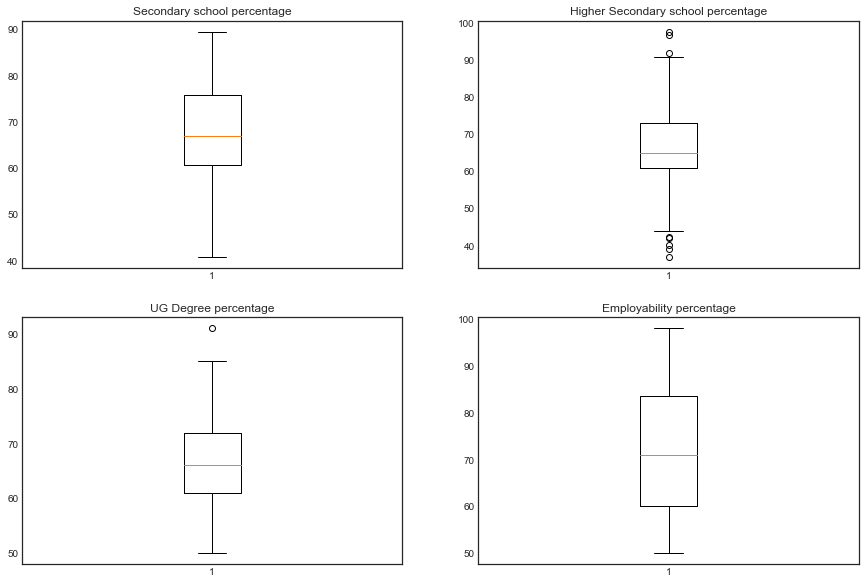

In [25]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(placement_copy['etest_p'])
ax.set_title('Employability percentage')

In [26]:
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p'] <= Q3 + 1.5 *IQR)
placement_filtered=placement_copy.loc[filter]

Text(0.5, 1.0, 'After removing outliers(hsc_p)')

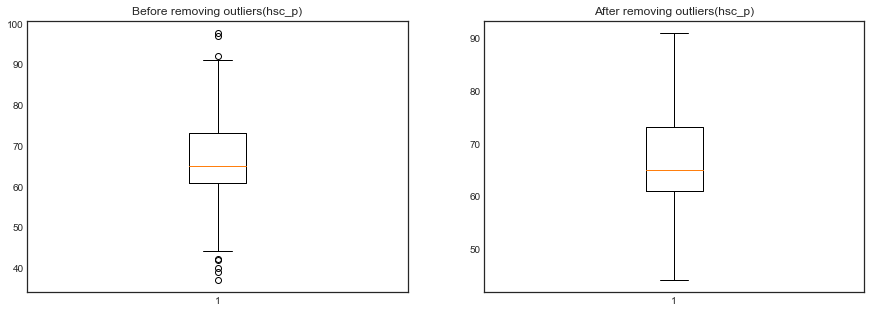

In [27]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Before removing outliers(hsc_p)')
ax=plt.subplot(122)
plt.boxplot(placement_filtered['hsc_p'])
ax.set_title('After removing outliers(hsc_p)')

In [28]:
## COUNT PLOTS

[Text(0, 0, 'Placed'), Text(1, 0, 'Not Placed')]

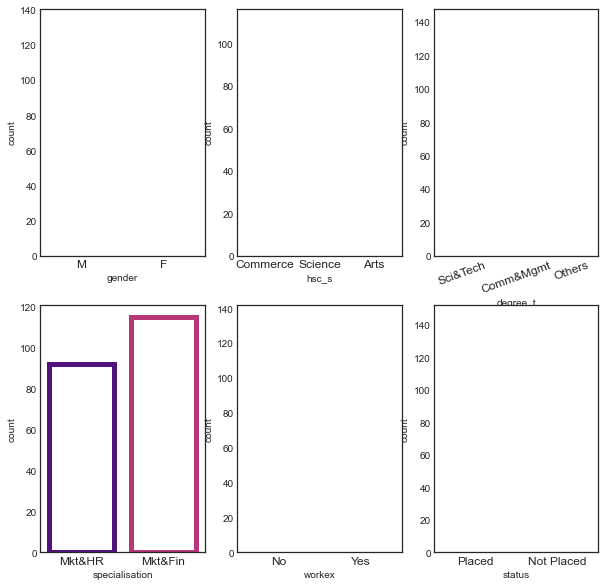

In [29]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Specialisation
plt.subplot(234)
ax=sns.countplot(x="specialisation", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("magma", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Work experience
plt.subplot(235)
ax=sns.countplot(x="workex", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Degree type
plt.subplot(233)
ax=sns.countplot(x="degree_t", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)

#Gender
plt.subplot(231)
ax=sns.countplot(x="gender", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Higher secondary specialisation
plt.subplot(232)
ax=sns.countplot(x="hsc_s", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Status of recruitment
plt.subplot(236)
ax=sns.countplot(x="status", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

[Text(0.5, 0, '')]

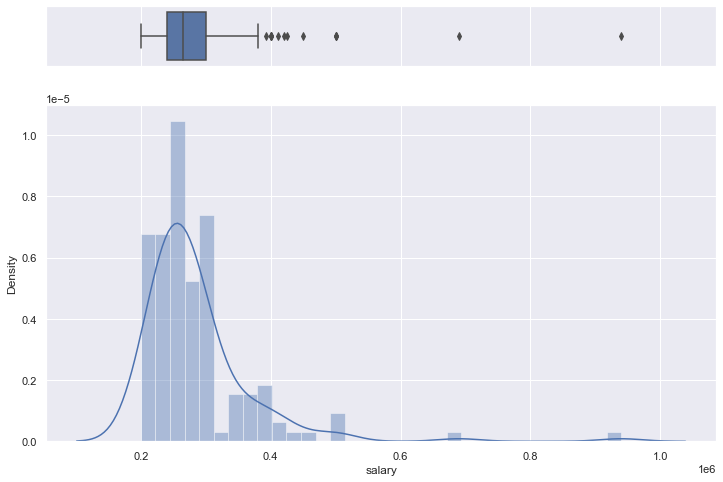

In [30]:
#Distribution Salary- Placed Students
sns.set(rc={'figure.figsize':(12,8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

placement_placed = placement_filtered[placement_filtered.salary != 0]
sns.boxplot(placement_placed["salary"], ax=ax_box)
sns.distplot(placement_placed["salary"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

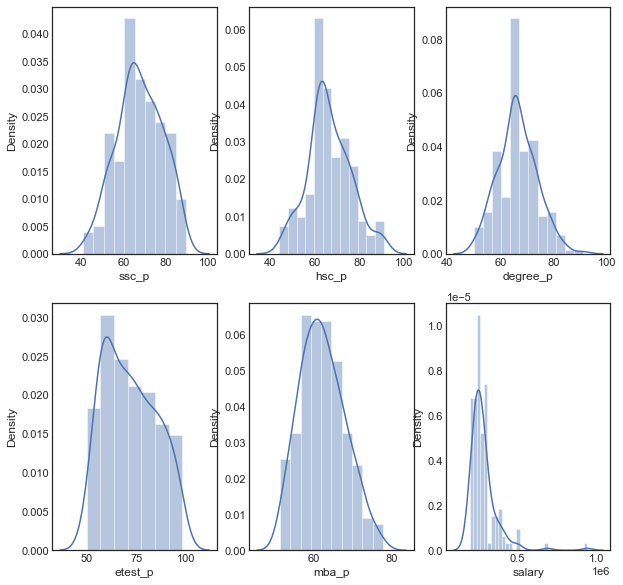

In [31]:
#Distribution of all percentages
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(placement_filtered['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(placement_filtered['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(placement_filtered['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(placement_filtered['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(placement_filtered['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(placement_placed['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

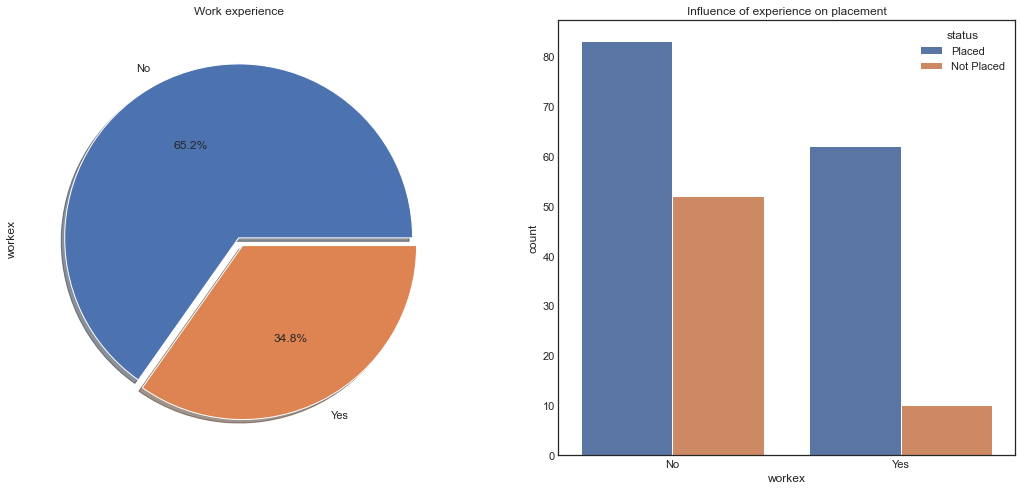

In [32]:
#Work experience Vs Placement Status

plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
placement_filtered['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = placement_filtered)
ax[1].set_title('Influence of experience on placement')
plt.show()

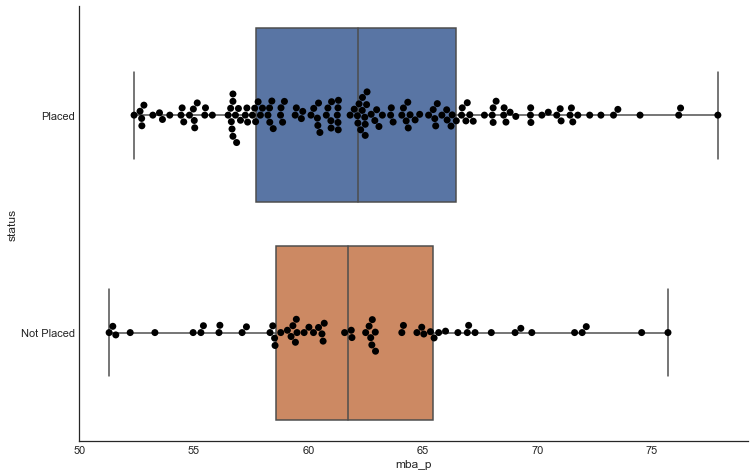

In [33]:
#MBA marks vs Placement Status- Does your academic score influence?
g = sns.boxplot(y = "status",x = 'mba_p',data = placement_filtered, whis=np.inf)
g = sns.swarmplot(y = "status",x = 'mba_p',data = placement_filtered, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

In [34]:
#Does MBA percentage and Employability score correlate?

gapminder=px.data.gapminder()
px.scatter(placement_filtered,x="mba_p",y="etest_p",color="status",facet_col="workex")


In [35]:
#Is there any gender bias while offering remuneration?
px.violin(placement_placed,y="salary",x="specialisation",color="gender",box=True,points="all")

<AxesSubplot:>

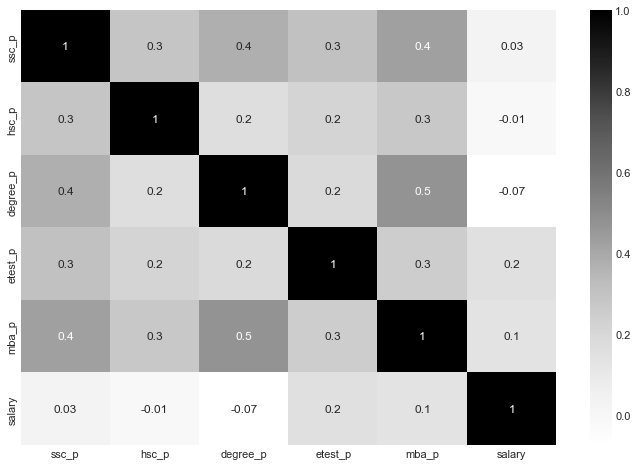

In [36]:
#Coorelation between academic percentages
sns.heatmap(placement_placed.corr(),annot=True,fmt='.1g',cmap='Greys')

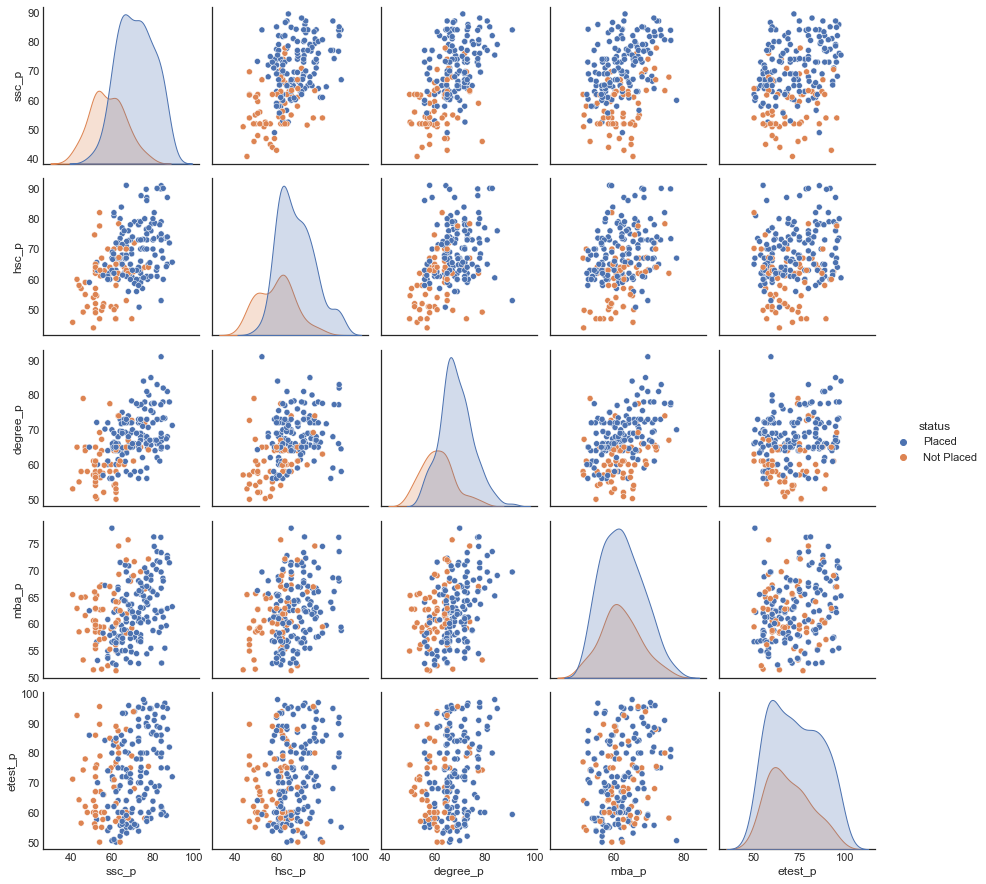

In [37]:
#Distribution of our data
sns.pairplot(placement_filtered,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")


In [40]:
#converting 'placed'= 1 , "Not placed" = 0
df['status'] = df['status'].replace(['Placed'],1)
df['status'] = df['status'].replace(['Not Placed'],0)


df['gender'] = df['gender'].replace(['M'],1)
df['gender'] = df['gender'].replace(['F'],0)


df['hsc_b'] = df['hsc_b'].replace(['Others'],1)
df['hsc_b'] = df['hsc_b'].replace(['Central'],2)

df['ssc_b'] = df['ssc_b'].replace(['Others'],1)
df['ssc_b'] = df['ssc_b'].replace(['Central'],2)


df['workex'] = df['workex'].replace(['Yes'],1)
df['workex'] = df['workex'].replace(['No'],0)

df['hsc_s'] = df['hsc_s'].replace(['Commerce'],1)
df['hsc_s'] = df['hsc_s'].replace(['Science'],2)
df['hsc_s'] = df['hsc_s'].replace(['Arts'],3)

df['specialisation'] = df['specialisation'].replace(['Mkt&HR'],1)
df['specialisation'] = df['specialisation'].replace(['Mkt&Fin'],2)


df['degree_t'] = df['degree_t'].replace(['Comm&Mgmt'],1)
df['degree_t'] = df['degree_t'].replace(['Sci&Tech'],2)
df['degree_t'] = df['degree_t'].replace(['Others'],3)

In [41]:
#converting object into int
df1= df
df1


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,2,1,79.33,2,78.33,1,2,77.48,2,1,86.5,2,66.28,1
2,3,1,65.00,2,68.00,2,3,64.00,1,0,75.0,2,57.80,1
3,4,1,56.00,2,52.00,2,2,52.00,2,0,66.0,1,59.43,0
4,5,1,85.80,2,73.60,2,1,73.30,1,0,96.8,2,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,1,0,91.0,2,74.49,1
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,2,53.62,1
212,213,1,67.00,1,67.00,1,1,73.00,1,1,59.0,2,69.72,1
213,214,0,74.00,1,66.00,1,1,58.00,1,0,70.0,1,60.23,1


In [42]:
# Splitting data into X and y

X = df1.drop(["sl_no","status"], axis=1)
y = df1["status"]

In [43]:
# Split data into train and test sets

np.random.seed(50)
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [44]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(solver='liblinear'),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(class_weight = {1:0.1, 0:0.9})}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(50)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [45]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8888888888888888,
 'KNN': 0.8148148148148148,
 'Random Forest': 0.8888888888888888}

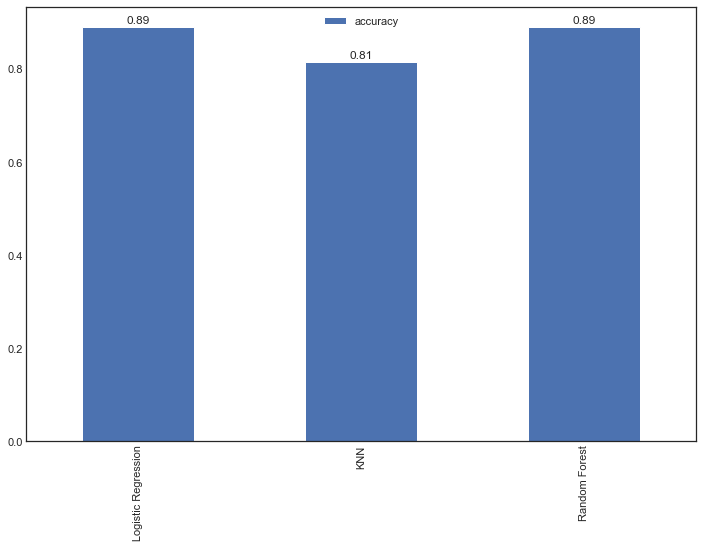

In [46]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
show_values(model_compare.T.plot.bar());

## Stratified K-fold Cross Validation

In [47]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model1=LogisticRegression()
scores1=cross_val_score(model1,X,y,cv=skfold)
print(np.mean(scores1))

0.855813953488372


In [48]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model2=RandomForestClassifier()
scores2=cross_val_score(model2,X,y,cv=skfold)
print(np.mean(scores2))

0.8372093023255814


## LOGISTIC REGRESSION

In [49]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [50]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.97      0.93      0.95        42

    accuracy                           0.93        54
   macro avg       0.88      0.92      0.90        54
weighted avg       0.93      0.93      0.93        54



In [53]:
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score 0.9259259259259259


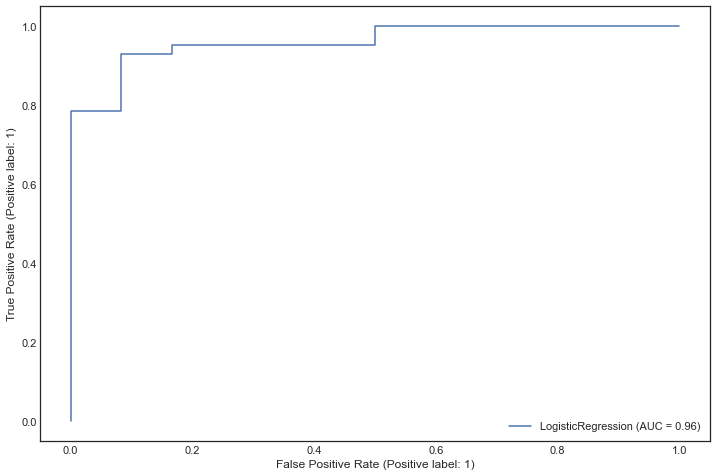

In [54]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(classifier, X_test, y_test)

In [ ]:
df

## CONCLUSION : LOGISTIC REGRESSION ~ Accuracy - 92%